In [6]:
import numpy as np
import pandas as pd
import seaborn as sns

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Embedding, LSTM, Conv1D, MaxPooling1D
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences 
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing import sequence

from attention import Attention
import matplotlib.pyplot as plt


In [7]:
# mnist 데이터셋 로드
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=5000)

In [8]:
# 원-핫 인코딩

X_train = sequence.pad_sequences(X_train, maxlen=500)
X_test = sequence.pad_sequences(X_test, maxlen=500)

In [10]:
# 모델의 구조 설정

model = Sequential()
model.add(Embedding(5000, 500))
model.add(Dropout(0.5))
model.add(LSTM(64, return_sequences=True))
model.add(Attention())
model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Activation('sigmoid'))
model.summary()

#  8. model 실행 옵션 설정
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

early_stopping = EarlyStopping(monitor='val_loss', patience=3)

hist = model.fit(X_train, y_train, epochs=100, batch_size=40,
                validation_data = (X_test, y_test), callbacks=[early_stopping])

print('test 정확도:', model.evaluate(X_test, y_test)[1])

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, None, 500)         2500000   
                                                                 
 dropout_4 (Dropout)         (None, None, 500)         0         
                                                                 
 lstm_2 (LSTM)               (None, None, 64)          144640    
                                                                 
 attention_2 (Attention)     (None, 128)               20480     
                                                                 
 dropout_5 (Dropout)         (None, 128)               0         
                                                                 
 dense_2 (Dense)             (None, 1)                 129       
                                                                 
 activation_2 (Activation)   (None, 1)                

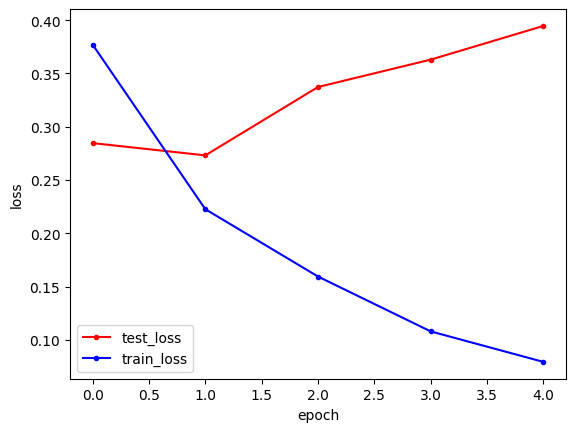

In [11]:
y_vloss = hist.history['val_loss']
y_loss = hist.history['loss']

x_len = np.arange(len(y_loss))
plt.plot(x_len, y_vloss, 'r.-', label='test_loss')
plt.plot(x_len, y_loss, 'b.-', label='train_loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend()
plt.show()